In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
# import historic data of EUR/USD for September 2020
df = pd.read_csv('september_data.csv')
df.columns = ["DATE", "TIME","OPEN","HIGH","LOW","CLOSE","VOLUME"]
print(df.head())

         DATE   TIME     OPEN     HIGH      LOW    CLOSE  VOLUME
0  2020.09.01  00:01  1.19897  1.19899  1.19880  1.19883       0
1  2020.09.01  00:02  1.19882  1.19884  1.19878  1.19879       0
2  2020.09.01  00:03  1.19881  1.19885  1.19876  1.19882       0
3  2020.09.01  00:04  1.19882  1.19886  1.19875  1.19885       0
4  2020.09.01  00:05  1.19884  1.19886  1.19880  1.19885       0


In [201]:
# slice the dataframe to include only datapoints with a 30 min interval
idf = df[(df["TIME"] == "00:00") ^ (df["TIME"] == "00:30")]
print(idf.head())

            DATE   TIME     OPEN     HIGH      LOW    CLOSE  VOLUME
29    2020.09.01  00:30  1.19909  1.19949  1.19905  1.19947       0
1428  2020.09.02  00:00  1.19031  1.19035  1.19027  1.19030       0
1458  2020.09.02  00:30  1.19063  1.19067  1.19053  1.19067       0
2861  2020.09.03  00:00  1.18208  1.18218  1.18207  1.18210       0
2891  2020.09.03  00:30  1.18107  1.18129  1.18107  1.18121       0


In [202]:
# define global variables
index = -1
position_size = 1000
account = 10000
portfolio = [10000]

In [203]:
def get_price():
    """" This is a function to get the current price. Since we're doing backtesting we'll be iterating through 
          the dataframe with the help of a global variable to keep track of the index. 
          This is the equivilant for retrieving the market price every 1 minut"""
    
    global index
    index += 1
    if index == len(idf):
        raise SystemExit('No more backtesting data')
    return round(idf.iloc[index]["CLOSE"],4)

In [204]:
def monitor_market():
    """ this function will monitor the intial mouvement of the market to determine either the first position
        should be a short or a long position"""
    start_price = get_price()
    end_price = get_price()
    if start_price < end_price:
        buy(end_price)
    else: 
        sell(end_price)

In [205]:
def buy(buy_price):
    """ This function opens a long position """
    global account
    sell_price = get_price()
    diff = round(sell_price - buy_price, 4)
    print("----------------------")
    print("LONG : ")
    print("Open Price :" + str(buy_price))
    print("Close Price :" + str(sell_price))
    print("----------------------")
    if sell_price > buy_price:
        print("win : " + str(diff))
        account += position_size*diff
        portfolio.append(account)
        buy(sell_price)
    else: 
        print("loss : " + str(diff))
        account += position_size*diff
        portfolio.append(account)
        sell(sell_price)

In [206]:
def sell(sell_price):
    """ This function opens a short position """
    global account
    buy_price = get_price()
    diff = round(buy_price - sell_price, 4)
    print("----------------------")
    print("SHORT : ")
    print("Open Price :" + str(buy_price))
    print("Close Price :" + str(sell_price))
    print("----------------------")
    if sell_price < buy_price:
        print("win : " + str(diff))
        account += position_size*diff
        portfolio.append(account)
        sell(sell_price)
    else: 
        account += position_size*diff
        print("loss : " + str(diff))
        portfolio.append(account)
        buy(sell_price)

In [207]:
# Start backtesting
monitor_market()

----------------------
SHORT : 
Open Price :1.1907
Close Price :1.1903
----------------------
win : 0.0004
----------------------
SHORT : 
Open Price :1.1821
Close Price :1.1903
----------------------
loss : -0.0082
----------------------
LONG : 
Open Price :1.1903
Close Price :1.1812
----------------------
loss : -0.0091
----------------------
SHORT : 
Open Price :1.1846
Close Price :1.1812
----------------------
win : 0.0034
----------------------
SHORT : 
Open Price :1.1852
Close Price :1.1812
----------------------
win : 0.004
----------------------
SHORT : 
Open Price :1.1836
Close Price :1.1812
----------------------
win : 0.0024
----------------------
SHORT : 
Open Price :1.1835
Close Price :1.1812
----------------------
win : 0.0023
----------------------
SHORT : 
Open Price :1.1808
Close Price :1.1812
----------------------
loss : -0.0004
----------------------
LONG : 
Open Price :1.1812
Close Price :1.1808
----------------------
loss : -0.0004
----------------------
SHORT : 


SystemExit: No more backtesting data

/home/issam/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


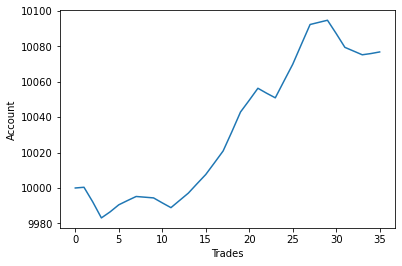

In [208]:
# plot the progression of the trading account
plt.plot(portfolio)
plt.xlabel("Trades")
plt.ylabel("Account")
plt.title("progression of the trading account")
plt.show()